<a href="https://colab.research.google.com/github/trorains/Machine_learning-Group_Task-1/blob/master/GroupTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
from numpy import array
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from google.colab import files
uploads=files.upload()

Saving train_data.csv to train_data.csv


To solve the problem of Nan values and infinity values we use the code snipet "data = data.fillna(method='ffill')" This is automaticallyvfoward fills in the missing values over the index axis

In [30]:
data = pd.read_csv('train_data.csv',header=0 ,na_filter=True,)
data = data.fillna(method='ffill')
data = data.drop("Id",1)
nominal=['MSSubClass','MSZoning','Alley','LotShape','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtExposure','Heating','Electrical','GarageType','MiscFeature','SaleType','SaleCondition','BsmtFinType2','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','BsmtQual','BsmtCond','BsmtFinType1']
ordinal = ['Street','CentralAir','Utilities','PavedDrive','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','HeatingQC','KitchenQual','Functional','PavedDrive']
numerical=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','Bedroom','Kitchen','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF','MiscVal','MoSold','YrSold']
target=['SalePrice']


for feature in ordinal:
  value = data[feature]
  encoder = LabelEncoder()
  # Certain cell had an type error thus had a try except block to continue over it
  try:
    trans_f = encoder.fit_transform(value)
    data[feature]=trans_f
  except TypeError:
            continue
  

data = pd.concat([pd.get_dummies(data[nominal]),data],axis=1) 
data.drop(nominal,axis=1,inplace=True)
data


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,...,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,2003,2003,196.0,2,4,706,0,150,856,0,1,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2003.0,2,548,2,0,61,0,0,0,0,0,2,2008,208500
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,1976,1976,0.0,3,4,978,0,284,1262,0,1,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1976.0,2,460,2,298,0,0,0,0,0,0,5,2007,181500
2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,2001,2002,162.0,2,4,486,0,434,920,0,1,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2001.0,2,608,2,0,42,0,0,0,0,0,9,2008,223500
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,1915,1970,0.0,3,4,216,0,540,756,2,1,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,1998.0,3,642,2,0,35,272,0,0,0,0,2,2006,140000
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,4,2000,2000,350.0,2,4,655,0,490,1145,0,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,2000.0,3,836,2,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,4,1999,2000,0.0,3,4,0,0,953,953,0,1,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,1999.0,2,460,2,0,40,0,0,0,0,0,8,2007,175000
1456,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,5,1978,1988,119.0,3,4,790,163,589,1542,4,1,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,1978.0,2,500,2,349,0,0,0,0,0,0,2,2010,210000
1457,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,1941,2006,0.0,0,2,275,0,877,1152,0,1,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,1941.0,1,252,2,0,60,0,0,0,0,2500,5,2010,266500
1458,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,5,1950,1996,0.0,3,4,49,1029,0,1078,2,1,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,1950.0,1,240,2,366,0,112,0,0,0,0,4,2010,142125


In [4]:

X = data.drop("SalePrice",1)
y = data["SalePrice"]
regressor=LassoCV()
regressor.fit(X,y)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [5]:
coef_col = pd.Series(regressor.coef_,index=X.columns)
sorted_coef = coef_col.sort_values()
no_of_selected_features = sum(coef_col != 0)
no_of_rejected_features = sum(coef_col == 0)
total_features = no_of_selected_features + no_of_rejected_features
print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the transformed dataset ")

L1 selected only  11  features out of  260  from the transformed dataset 


In [0]:
all_features = list(data.columns)
X = data.loc[:,all_features].values

y = data.loc[:,["SalePrice"]].values
X

In [0]:
X = StandardScaler().fit_transform(X)
X

In [0]:
pca = PCA(n_components=2)
pc_s = pca.fit_transform(X)
pca_data = pd.DataFrame(pc_s,columns=['PC1','PC2'])
final_data = pd.concat([pca_data,data[target]],axis = 1)
final_data_array  = final_data.to_numpy()

In [19]:
pca.explained_variance_ratio_

array([0.06386029, 0.02881337])

pc1 = 6% Information
pc2 = 2% Information

In [0]:
pca = PCA(0.90)
pc_s = pca.fit_transform(X)

In [21]:
pca.explained_variance_
len(pca.explained_variance_)

144

We would need 144 principal components

In [0]:
minimum = np.min(final_data_array, axis=0)
maximum = np.min(final_data_array, axis=0)
X,Y=np.meshgrid(np.linspace(minimum[0],maximum[0],2), np.linspace(minimum[1], maximum[1], 1460))



In [27]:
regressor=LassoCV()
# final_train = np.c_[final_data_array[:,0],final_data_array[:,1]]
X= final_data.drop('SalePrice',1)
y=final_data['SalePrice']
regressor.fit(X,y)
weight1= regressor.coef_[0]
weight2 = regressor.coef_[1]
c= regressor.intercept_
Z= weight1*X + weight2*Y + c
Z

,PC1,PC2
0,247150.411754,171126.433864
1,187545.058660,239575.677544
2,256470.877570,180549.239211
3,154726.177152,166221.485449
4,285960.379017,183381.616571
...,...,...
1455,220993.855897,152197.562781
1456,200614.677763,264162.130179
1457,205608.159567,152934.514213
1458,135894.333412,245869.456289


Text(0.5, 0.92, 'Plane')

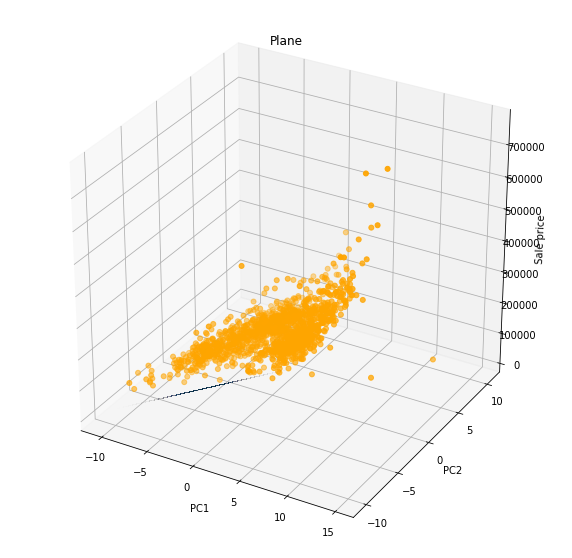

In [31]:
fig1 = plt.figure(figsize=(10, 10))
ax = fig1.gca(projection=Axes3D.name)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.9)
ax.scatter(final_data_array[:,0], final_data_array[:,1], final_data_array[:,2], c='orange',s=25)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('Sale price')
ax.set_title('Plane')